In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# #ignore runtime warnings
# import warnings
# warnings.filterwarnings('ignore')

from tqdm import tqdm

In [2]:
df = pd.read_excel('2. Condo Tamp Paris Ris H1 price.xlsx')
df.head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level,Unnamed: 17,Unnamed: 18
0,DOUBLE BAY RESIDENCES,1723000,1270.15,1357,2023-06-01,SIMEI STREET 4,Resale,Strata,118,14602,-,Condominium,1,99 yrs lease commencing from 2008,18,Outside Central Region,11 to 15,NaN,NaN
1,EASTPOINT GREEN,1088888,968.76,1124,2023-06-01,SIMEI STREET 3,Resale,Strata,90,12099,-,Condominium,1,99 yrs lease commencing from 1996,18,Outside Central Region,01 to 05,NaN,NaN
2,EASTPOINT GREEN,1198000,1194.80,1003,2023-06-01,SIMEI STREET 3,Resale,Strata,111,10793,-,Condominium,1,99 yrs lease commencing from 1996,18,Outside Central Region,01 to 05,NaN,NaN
3,Q BAY RESIDENCES,1570000,1119.46,1402,2023-06-01,TAMPINES STREET 86,Resale,Strata,104,15096,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,11 to 15,NaN,"Postal District: D18 / Tampines, Pasir Ris"
4,VUE 8 RESIDENCE,1500000,1087.16,1380,2023-06-01,PASIR RIS HEIGHTS,Resale,Strata,101,14851,-,Condominium,1,99 yrs lease commencing from 2012,18,Outside Central Region,11 to 15,NaN,NaN


In [7]:
q1 = df[['Transacted Price ($)', 'Area (SQFT)']]

# Q1C

Number of iterations is 5
The local minimum occurs when b is 1146.5100432247054
Minimum error is 49345190011.597824
Equation of line is: Transacted Price ($) = 1147 Area (SQFT)


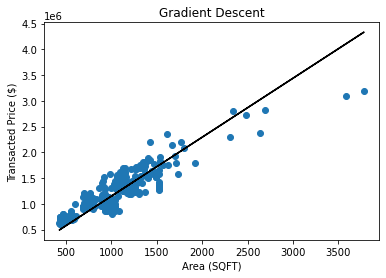

In [9]:
# In question 1, we are trying to find the value of b (gradient) for which Error function E(b) is at its minimum.
# Assume that the value of a (intercept) is 0.
# y = a + bx
# a is intercept, b is gradient, q1 is dataframe
x = q1['Area (SQFT)']
y = q1['Transacted Price ($)']

mse = lambda a, b: np.mean((y - (a + b * x)) ** 2)

error_derivative_b = lambda a, b: np.mean(-2 * x * (y - (a + b * x)))

def gradient_descent(a_inital, b_initial, max_iterations, learning_rate, epsilon):
    a = a_inital
    b = b_initial
    iterations = 0
    for i in range(max_iterations):
        if np.abs(error_derivative_b(a, b)) < epsilon:
            break
        b = b - (learning_rate * error_derivative_b(a, b))
        iterations += 1
    print(f'Number of iterations is {iterations}')
    print(f'The local minimum occurs when b is {b}')
    print(f'Minimum error is {mse(a, b)}')
    print(f'Equation of line is: Transacted Price ($) = {b:.0f} Area (SQFT)')
    return a, b

a, b = gradient_descent(0, 0, 500, 0.000000386, 0.00001)

# Plotting the graph
plt.scatter(x, y)
x = np.array(x)
plt.plot(x, b * x, color='black')
plt.xlabel('Area (SQFT)')
plt.ylabel('Transacted Price ($)')
plt.title('Gradient Descent')
plt.show()

## Tuning of learning rate

In [16]:
x = q1['Area (SQFT)']
y = q1['Transacted Price ($)']

mse = lambda a, b: np.mean((y - (a + b * x)) ** 2)

error_derivative_b = lambda a, b: np.mean(-2 * x * (y - (a + b * x)))

def gradient_descent(a_inital, b_initial, max_iterations, learning_rate_list, epsilon):
    df_learning_rate_df = pd.DataFrame(columns=['learning_rate', 'iterations'])
    for learning_rate in tqdm(learning_rate_list):
        a = a_inital
        b = b_initial
        iterations = 0
        for i in range(max_iterations):
            if np.abs(error_derivative_b(a, b)) < epsilon:
                break
            b = b - (learning_rate * error_derivative_b(a, b))
            iterations += 1
        df_learning_rate_df.loc[len(df_learning_rate_df)] = [learning_rate, iterations]
    return df_learning_rate_df

learning_rate_list = np.arange(0.000000001, 0.0000009, 0.000000001)

df_learning_rate_df = gradient_descent(0, 0, 1000, learning_rate_list, 0.0001)

100%|██████████| 899/899 [02:09<00:00,  6.92it/s] 


In [17]:
df_learning_rate_df.sort_values(by='iterations', ascending=True).head(10)

,learning_rate,iterations
385,3.860000e-07,5.0
386,3.870000e-07,5.0
387,3.880000e-07,6.0
384,3.850000e-07,6.0
389,3.900000e-07,7.0
388,3.890000e-07,7.0
383,3.840000e-07,7.0
382,3.830000e-07,7.0
381,3.820000e-07,7.0
380,3.810000e-07,8.0


# Q2C

In [11]:
q2 = df[['Transacted Price ($)', 'Area (SQFT)']]

Number of iterations is 1401
The local minimum occurs when b is 876.5252626488801 and a is 332008.9118469691
Minimum error is 33457535601.765625
equation: Transacted Price ($) = 332009 + 876.5 Area (SQFT)


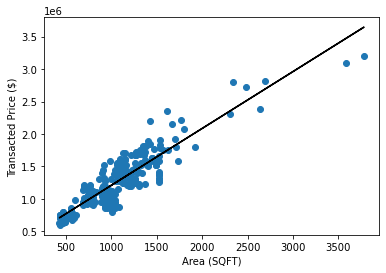

In [21]:
# In question 2, we are trying to find the value of b (gradient) and a (intercept) for which Error function E(a,b) is at its minimum.
# y = a + bxy
# a is intercept, b is gradient, df is dataframe

x = q2['Area (SQFT)']
y = q2['Transacted Price ($)']

mse = lambda a, b: np.mean((y - (a + b * x)) ** 2)

error_derivative_a = lambda a, b: np.mean(-2 * (y - (a + b * x)))

error_derivative_b = lambda a, b: np.mean(-2 * x * (y - (a + b * x)))

def gradient_descent(a_inital, b_initial, max_iterations, learning_rate_a, learning_rate_b, epsilon):
    a = a_inital
    b = b_initial
    iterations = 0
    for i in range(max_iterations):
        print(error_derivative_a(a, b)**2 + error_derivative_b(a, b)**2, end='\r')
        a = a - (learning_rate_a * error_derivative_a(a, b))
        b = b - (learning_rate_b * error_derivative_b(a, b))
        if (error_derivative_a(a, b)**2 + error_derivative_b(a, b)**2) < epsilon:
            break
        iterations += 1
    print(f'Number of iterations is {iterations}')
    print(f'The local minimum occurs when b is {b} and a is {a}')
    print(f'Minimum error is {mse(a, b)}')
    print(f'equation: Transacted Price ($) = {a:.0f} + {b:.1f} Area (SQFT)')

    return a, b

a, b = gradient_descent(0, 0, 10000, 0.1, 0.0000001, 0.00000001)

plt.scatter(x, y)
x = np.array(x)
plt.plot(x, a + b * x, color='black')
plt.xlabel('Area (SQFT)')
plt.ylabel('Transacted Price ($)')
plt.show()

## Tuning of learning rates

In [9]:
x = q2['Area (SQFT)']
y = q2['Transacted Price ($)']

mse = lambda a, b: np.mean((y - (a + b * x)) ** 2)

error_derivative_a = lambda a, b: np.mean(-2 * (y - (a + b * x)))

error_derivative_b = lambda a, b: np.mean(-2 * x * (y - (a + b * x)))

df_results = pd.DataFrame(columns=['learning rate a', 'b_learning rate', 'iterations'])

def gradient_descent(a_inital, b_initial, max_iterations, learning_rate_a_list, learning_rate_b_list, epsilon):
    for learning_rate_a in learning_rate_a_list:
        for learning_rate_b in tqdm(learning_rate_b_list, desc="Learning Rate B", leave=False):
            a = a_inital
            b = b_initial
            iterations = 0
            for i in range(max_iterations):
                a = a - (learning_rate_a * error_derivative_a(a, b))
                b = b - (learning_rate_b * error_derivative_b(a, b))
                if (error_derivative_a(a, b)**2 + error_derivative_b(a, b)**2) < epsilon:
                    break
                iterations += 1
            df_results.loc[len(df_results)] = [learning_rate_a, learning_rate_b, iterations]

    return df_results

learning_rate_a_list = np.arange(0.01, 0.90, 0.01)
learning_rate_b_list = np.arange(0.0000001, 0.000009, 0.0000001)


df_results = gradient_descent(0, 0, 500, learning_rate_a_list, learning_rate_b_list, 0.00000001)

In [10]:
df_results.sort_values(by=['iterations'], ascending=True)

NameError: name 'df_results' is not defined

In [ ]:
df_results.head(30)

,learning rate a,b_learning rate,iterations
0,0.01,1.000000e-07,500.0
1,0.01,2.000000e-07,500.0
2,0.01,3.000000e-07,500.0
3,0.01,4.000000e-07,500.0
4,0.01,5.000000e-07,500.0
5,0.01,6.000000e-07,500.0
6,0.01,7.000000e-07,500.0
7,0.01,8.000000e-07,500.0
8,0.01,9.000000e-07,500.0
9,0.01,1.000000e-06,500.0


In [ ]:
learning_rate_a_list = np.arange(0.01, 0.90, 0.01)
learning_rate_b_list = np.arange(0.0000001, 0.000009, 0.0000001)
total_possible_combinations = len(learning_rate_a_list) * len(learning_rate_b_list)
print("Total a: ", len(learning_rate_a_list))
print("Total b: ", len(learning_rate_b_list))

Total a:  89
Total b:  89


# Q3

In [3]:
q3 = df[['Transacted Price ($)', 'Area (SQFT)', 'Unit Price ($ PSF)']]
q3

,Transacted Price ($),Area (SQFT),Unit Price ($ PSF)
0,1723000,1270.15,1357
1,1088888,968.76,1124
2,1198000,1194.80,1003
3,1570000,1119.46,1402
4,1500000,1087.16,1380
...,...,...,...
302,1541888,1496.20,1031
303,1420000,1237.86,1147
304,950000,699.66,1358
305,683000,570.49,1197


<function matplotlib.pyplot.show(close=None, block=None)>

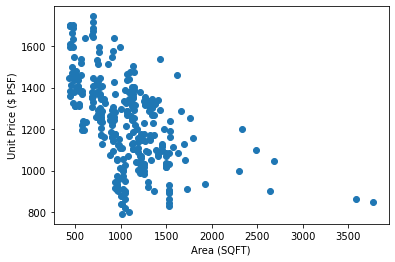

In [4]:
x = q3['Area (SQFT)']
w = q3['Unit Price ($ PSF)']
plt.scatter(x, w)
plt.xlabel('Area (SQFT)')
plt.ylabel('Unit Price ($ PSF)')
plt.show

Number of iterations: 6921
Equation: y = -986448.8251237596 + 1102.359570404108x + 873.1183441557082w
Error: 9472197489.659609


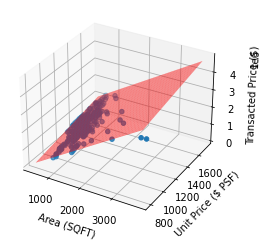

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = q3['Area (SQFT)']
w = q3['Unit Price ($ PSF)']
y = q3['Transacted Price ($)']

def mse(a, b, c):
    y_pred = a + b * x + c * w
    return np.mean((y - y_pred) ** 2)

def error_derivative_a(a, b, c):
    return np.mean(-2 * (y - (a + b * x + c * w)))

def error_derivative_b(a, b, c):
    return np.mean(-2 * x * (y - (a + b * x + c * w)))

def error_derivative_c(a, b, c):
    return np.mean(-2 * w * (y - (a + b * x + c * w)))

def gradient_descent(a_initial, b_initial, c_initial, max_iterations, learning_rate_a, learning_rate_b, learning_rate_c, epsilon):
    a = a_initial
    b = b_initial
    c = c_initial
    iterations = 0
    for i in range(max_iterations):
        gradient_a = error_derivative_a(a, b, c)
        gradient_b = error_derivative_b(a, b, c)
        gradient_c = error_derivative_c(a, b, c)
        
        a -= learning_rate_a * gradient_a
        b -= learning_rate_b * gradient_b
        c -= learning_rate_c * gradient_c
        
        if np.abs(gradient_a**2 + gradient_b**2 + gradient_c**2) < epsilon:
            break
        
        iterations += 1
    
    print(f'Number of iterations: {iterations}')
    print(f'Equation: y = {a} + {b}x + {c}w')
    print(f'Error: {mse(a, b, c)}')

    return a, b, c

a, b, c = gradient_descent(0, 0, 0, 10000, 0.3, 0.0000001, 0.0000001, 0.00001)

# Redefine x and w using the original DataFrame columns
x = q3['Area (SQFT)']
w = q3['Unit Price ($ PSF)']

# Plot the graph
# %matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, w, y)

# Create a meshgrid for the surface plot
x_vals = np.linspace(min(x), max(x), 100)
w_vals = np.linspace(min(w), max(w), 100)
x_vals, w_vals = np.meshgrid(x_vals, w_vals)
y_pred = a + b * x_vals + c * w_vals

ax.plot_surface(x_vals, w_vals, y_pred, color='r', alpha=0.5)  # Plot the regression plane


ax.set_xlabel('Area (SQFT)')
ax.set_ylabel('Unit Price ($ PSF)')
ax.set_zlabel('Transacted Price ($)')

plt.show()

## Verification

In [6]:
from sklearn.linear_model import LinearRegression

# Assuming q3 is your DataFrame
X = q3[['Area (SQFT)', 'Unit Price ($ PSF)']]
y = q3['Transacted Price ($)']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

# Print the intercept and coefficients
print("Intercept (a):", model.intercept_)
print("Coefficient for Area (b):", model.coef_[0])
print("Coefficient for Unit Price (c):", model.coef_[1])

Intercept (a): -986448.8252678358
Coefficient for Area (b): 1102.3595704345598
Coefficient for Unit Price (c): 873.1183442455658
